## Data Simulation for Causal ML Workshop Data Science Day Prague

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Set the seed for reproducibility
np.random.seed(1234)

# Set the number of users and unique days
num_users = 1000
num_days = 3 * 31

# Generate user_id, day, and characteristic columns
user_ids = np.repeat(range(num_users), num_days)
days = pd.date_range(start='2023-11-17', periods=num_days, freq='D')
ch1 = np.random.uniform(0, 100, num_users * num_days).astype(int)
ch2 = np.random.randint(0, 10, num_users)

# Generate treated column
treated = np.random.choice([0, 1], num_users,  p=[0.8, 0.2])
#treated = np.random.uniform(0, 10, num_users * num_days).astype(int)

# Create the dataframe
df = pd.DataFrame({
    'user_id': user_ids,
    'day': np.tile(days, num_users),
    'ch1': ch1,
    'ch2': np.repeat(ch2, num_days),
    'treated': np.repeat(treated, num_days),
})

df['day'] = pd.to_datetime(df['day'])
df['weekday'] = df['day'].dt.weekday

# Simulate kpi data generating process
df['kpi'] = 50 \
            + 0.5 * df['treated'] \
            + 0.02 * df['treated'] * df['ch2'] \
            - 0.05 * df['treated'] * df['ch1'] \
            - 0.001 * df['treated'] * df['ch2']**2 \
            + 0.005 * df['treated'] * df['ch1']**2 \
            + 0.05 * df['treated'] * df['weekday']**2 \
            + 0.005 * df['ch1'] \
            - 0.01 * df['ch1']**2 \
            + 0.05 * df['ch2'] \
            + 0.01 * df['ch2']**2 \
            - 0.01 * df['weekday'] \
            + 0.05 * df['weekday']**2 \
            - 0.03 * df['weekday']**3 \
            + np.random.uniform(0, 30, num_users * num_days)

df.loc[(df['weekday'] >= 5) & (df['treated'] == 1), 'kpi'] += 10
df.loc[(df['weekday'] < 5) & (df['treated'] == 1), 'kpi'] -= 6

df['kpi'] = df['kpi'].apply(lambda x: max(0, x)).astype(int)

# Convert day column to pandas datetime format
df['day'] = pd.to_datetime(df['day'])

# Display the dataframe
df.head()


,user_id,day,ch1,ch2,treated,weekday,kpi
0,0,2023-11-17,19,4,0,4,70
1,0,2023-11-18,62,4,0,5,27
2,0,2023-11-19,43,4,0,6,42
3,0,2023-11-20,78,4,0,0,4
4,0,2023-11-21,77,4,0,1,21


In [3]:
df.shape

(93000, 7)

In [4]:
df.treated.value_counts()

0    75795
1    17205
Name: treated, dtype: int64

<Axes: >

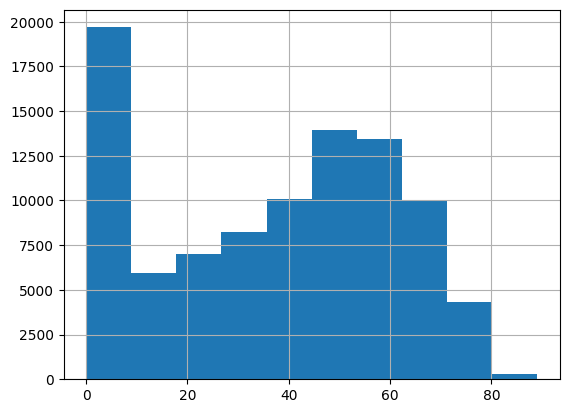

In [5]:
df.kpi.hist()

In [6]:
df = df.drop(columns= 'weekday')

In [7]:
df.to_csv('data.csv', index=False)